<a href="https://colab.research.google.com/github/KsuPav/diploma/blob/main/Diplomchik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://debuggercafe.com/a-guide-to-xgboost-in-python/


**Импортируем необходимые библиотеки**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import xgboost as xgb
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix,  recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split



**Загрузка CSV-файла с гугл диска**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('/content/drive/My Drive/ДИПЛОМ/Colab Notebooks/data_2019_4_MA.csv', encoding = 'utf-8')
data2 = pd.read_csv('/content/drive/My Drive/ДИПЛОМ/Colab Notebooks/data_2020_5_MA.csv', encoding = 'utf-8')

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

Mounted at /content/drive


In [ ]:
data1

,Класс,Код_предмета,ЛогинОО,Балл,Отметка,Year,region_code,ввп,объекты,Транспортная доступность
0,4,2,sch01110001,11,4,2019,1,309184.1,5.0,8.38
1,4,2,sch01110001,18,5,2019,1,309184.1,5.0,8.38
2,4,2,sch01110001,9,3,2019,1,309184.1,5.0,8.38
3,4,2,sch01110001,11,4,2019,1,309184.1,5.0,8.38
4,4,2,sch01110001,8,3,2019,1,309184.1,5.0,8.38
...,...,...,...,...,...,...,...,...,...,...
1382894,4,2,sch92126007,9,3,2019,92,295304.9,48.0,10.68
1382895,4,2,sch92126007,16,5,2019,92,295304.9,48.0,10.68
1382896,4,2,sch92126007,10,4,2019,92,295304.9,48.0,10.68
1382897,4,2,sch92126007,17,5,2019,92,295304.9,48.0,10.68


In [ ]:
a = data1.ЛогинОО.unique()

In [ ]:
print(data1.Класс.unique())

[4]


In [ ]:
data1['ЛогинОО'].value_counts()

sch23133985    731
sch72120397    670
sch23133988    548
sch72123046    534
sch24146265    417
              ... 
sch31116113      1
sch46166013      1
sch27173202      1
sch24146238      1
sch46163286      1
Name: ЛогинОО, Length: 35667, dtype: int64

In [ ]:
  mask = data1['region_code'] == 1
  ch = data1[mask]

In [ ]:
ch

,Класс,Код_предмета,ЛогинОО,Балл,Отметка,Year,region_code,ввп,объекты,Транспортная доступность
0,4,2,sch01110001,11,4,2019,1,309184.1,5.0,8.38
1,4,2,sch01110001,18,5,2019,1,309184.1,5.0,8.38
2,4,2,sch01110001,9,3,2019,1,309184.1,5.0,8.38
3,4,2,sch01110001,11,4,2019,1,309184.1,5.0,8.38
4,4,2,sch01110001,8,3,2019,1,309184.1,5.0,8.38
...,...,...,...,...,...,...,...,...,...,...
5607,4,2,sch01116052,16,5,2019,1,309184.1,5.0,8.38
5608,4,2,sch01116052,13,4,2019,1,309184.1,5.0,8.38
5609,4,2,sch01116052,14,4,2019,1,309184.1,5.0,8.38
5610,4,2,sch01116052,9,3,2019,1,309184.1,5.0,8.38


In [ ]:
import statistics
data1_new = pd.DataFrame()
k=0

for i in a:
  mask = data1['ЛогинОО'] == i
  d = data1[mask]
  mean = d.Отметка.mean()

  st = {'Класс':4,
        'Код_предмета':2,
        'ЛогинОО':i,
        'Отметка':mean,
        'Year':2019,
        'region_code':data1.region_code.unique()[0],
        'ввп':data1.ввп.unique()[0],
        'объекты':data1.объекты.unique()[0]}
        #'Транспортная доступность':data1.Транспортная доступность.unique()[0]}
  
  k+=1
  if k==100:
    break
  print(k/35667*100)
  
  #print(st)
  data1_new = data1_new.append(st, ignore_index=True)
  #print(data1_new)

In [ ]:
data1_new

,Класс,Код_предмета,ЛогинОО,Отметка,Year,region_code,ввп,объекты
0,4.0,2.0,sch01110001,3.971014,2019.0,1.0,309184.1,5.0
1,4.0,2.0,sch01110003,4.057692,2019.0,1.0,309184.1,5.0
2,4.0,2.0,sch01110004,4.220588,2019.0,1.0,309184.1,5.0
3,4.0,2.0,sch01110005,3.434783,2019.0,1.0,309184.1,5.0
4,4.0,2.0,sch01110006,4.230769,2019.0,1.0,309184.1,5.0
...,...,...,...,...,...,...,...,...
94,4.0,2.0,sch01113017,4.000000,2019.0,1.0,309184.1,5.0
95,4.0,2.0,sch01113018,4.200000,2019.0,1.0,309184.1,5.0
96,4.0,2.0,sch01113019,3.750000,2019.0,1.0,309184.1,5.0
97,4.0,2.0,sch01113020,4.250000,2019.0,1.0,309184.1,5.0


In [ ]:
mask = data1['Year'] == 2019
data_2019, data_2020 = data[mask], data[~mask]

In [ ]:


city_omsk = {'Город':'Омск','Дата основания':'1716','Площадь':'573','Население':'1,2'}

city_new_df = city_df.append(city_omsk, ignore_index=True)
city_new_df

In [ ]:
data1['Код_ученика'].value_counts()

**Обработка**

In [ ]:
# Проверка типов
print(data1.dtypes)


Класс                         int64
Код_предмета                  int64
ЛогинОО                      object
Балл                          int64
Отметка                       int64
Year                          int64
region_code                   int64
ввп                         float64
объекты                     float64
Транспортная доступность    float64
dtype: object


In [ ]:
# Убираем ненужные признаки
data1 = data1.drop(['названиерегиона','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Код_ученика'], axis=1)
data2 = data2.drop(['названиерегиона','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Код_ученика'], axis=1)

In [ ]:
# Кодирование
encoder = LabelEncoder()
data1['ЛогинОО'] = encoder.fit_transform(data1['ЛогинОО'])
data2['ЛогинОО'] = encoder.fit_transform(data2['ЛогинОО'])


print(data1.dtypes)

Класс                         int64
Код_предмета                  int64
ЛогинОО                       int64
Балл                          int64
Отметка                       int64
Year                          int64
region_code                   int64
ввп                         float64
объекты                     float64
Транспортная доступность    float64
dtype: object


**Разделение наборов**

In [ ]:
# Разделение параметров и меток
x_train = data1.drop(['Балл', 'Отметка'], axis=1)
y_train = data1['Отметка']

x_test = data2.drop(['Балл', 'Отметка'], axis=1)
y_test = data2['Отметка']


# train-test (85% - обучение, 15% - валидация)
#x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_1, labels_1, test_size=0.00000000001)
#x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features, labels_2, train_size=0.85)

In [ ]:
# Преобразование в DMatrix
d_train = xgb.DMatrix(x_train, y_train)
d_test = xgb.DMatrix(x_test, y_test)

**Настройка параметров**

*booster* указывает тип бустера, который будет использовать XGBoost. По умолчанию gbtree.

*max_depth* - максимальная глубина дерева. Очень высокое значение может привести к перегрузке алгоритма.

*learning_rate* - скорость обучения алгоритма, которая установлена на 0.1. Указание, как быстро наш алгоритм будет сходиться к оптимальному решению.

*sample_type* - тип выборки, используемый для отброшенных деревьев. Может быть либо *uniform*, либо *weighted*.

*normalize_type* - тип алгоритма нормализации, который будет использоваться во время обучения.

*objective* - цель обучения для алгоритма. *binary:hinge* выдает результаты классификации (либо 0, либо 1).

*rate_drop* - коэффициент отсева деревьев. Диапазон от 0.0 до 1.0. Использовали 0.1, значит 10% деревьев будут отброшены.

*n_estimators* -  количество усиленных деревьев для использования во время обучения.

In [ ]:
params_0 = {
    #'tree_method': 'approx', # 'auto' не подходит, слижком большой датасет
    'booster': 'gbtree',
    #'max_depth': 5, 
    #'learning_rate': 1,
    #'sample_type': 'uniform',
    #'normalize_type': 'tree',
    #'objective': 'reg:squarederror', # регрессия с квадратом потерь
    #'rate_drop': 0.1,
    #'n_estimators': 500
}

In [ ]:
xgb_clf = xgb.train(params_0, d_train)

**Визуализация важности параметров**

<Figure size 1152x864 with 0 Axes>

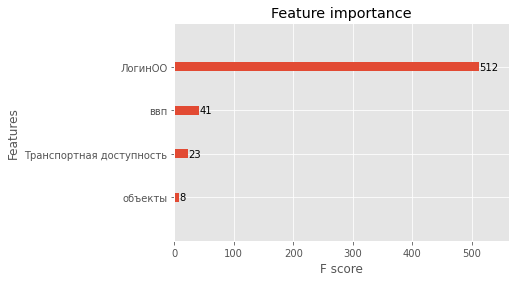

In [ ]:
plt.figure(figsize=(16, 12))
xgb.plot_importance(xgb_clf)
plt.show()

In [ ]:
# Прогноз
preds = xgb_clf.predict(d_test)

In [ ]:
y_test

0          3
1          5
2          3
3          5
4          4
          ..
1265657    5
1265658    4
1265659    4
1265660    5
1265661    5
Name: Отметка, Length: 1265662, dtype: int64

In [ ]:
print(preds)

[3.9695802 3.9695802 3.9695802 ... 4.017791  4.017791  4.017791 ]


In [ ]:
preds_round = preds.round().astype(int)

In [ ]:
# Процент ошибок в прогнозировании отметок
print(round((y_test != preds_round).sum() / y_test.size * 100), '%')

56 %


In [ ]:
# Процент ошибок в прогнозировании баллов
print(round((y_test != preds_round).sum() / y_test.size * 100), '%')

In [ ]:
print(accuracy_score(y_test_1, preds_1_round))
print(accuracy_score(y_test_2, preds_2_round))

In [ ]:
print(balanced_accuracy_score(y_test_1, preds_1_round))
print(balanced_accuracy_score(y_test_2, preds_2_round))


In [ ]:
print(confusion_matrix(y_test_1, preds_1_round))
print(confusion_matrix(y_test_2, preds_2_round))

In [ ]:
print(classification_report(y_test_1, preds_1_round))
print(classification_report(y_test_2, preds_2_round))

In [ ]:
print(multilabel_confusion_matrix(y_test_1, preds_1_round))
print(multilabel_confusion_matrix(y_test_2, preds_2_round))

In [ ]:
#Проверка корреляции
gbm
col_names = x_train_1.columns
for col, val in sorted(zip(col_names, gbm.feature_importances_), key=lambda x:x[1], reverse=True,)[:10]:
    print(f"{col:10}{val:10.3f}")

In [ ]:
# Оптимизация
import xgboost as xgb
model = xgb.XGBClassifier()
#gbm = model.fit(x_train_1, y_train_1)
#gbm.score(x_test_1, y_test_1)

In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV

params = {'n_estimators':[67, 70, 100, 120, 200, 315],
          'reg_lambda':[2, 1],
          'gamma':[0,0.3,0.2,0.1],
          'max_depth':list(range(3, 6)), 
          'learning_rate':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.05,0.09],
          'min_child_weight ':[1, 3, 5, 7, 9],    
}
clf=GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=1)
clf.fit(x_train_1, y_train_1)

Fitting 10 folds for each of 7200 candidates, totalling 72000 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params1 = {'n_estimators': [100, 200, 500, 800, 1000, 1200],
          'max_depth': [3,5,7],
          'objective': ['binary:logistic'],
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2, 5],
          }

rfc_cv = RandomizedSearchCV(model, params, cv = 10, n_jobs=-1, verbose=2).fit(x_train_1, y_train_1)

Итоговые параметры для Xgboost выглядят так:


```
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight = 1,
              monotone_constraints='()', n_estimators=305, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=2,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
gbm = model.fit(X_train, y_train)
gbm.score(X_test, y_test)
```

Теперь мы можем сделать прогноз, применив обученную модель на тестовом и тренировочных наборах.

```
y_pred=gbm.predict(X_train)
t_pred=gbm.predict(X_test)
print(accuracy_score(y_pred, y_train))
print(accuracy_score(t_pred, y_test))
print(gbm.feature_importances_)
```

Формируем дополнительные поля для итоговой выгрузки:

```
xgb_predictions=xgb_model.predict(X)
xgb_probability=xgb_model.predict_proba(X)
xgb_probability=[max(row) for row in xgb_probability]

stoks2['ML П'] = pd.Series(xgb_predictions)
stoks2['ML В'] = pd.Series(xgb_probability)
```

Выгрузка результата в Excel:


```
stoks2.to_excel("xgboost.xlsx")
```

In [ ]:
# Оценка точности
print(np.round(mean_squared_error(y_val_1, preds_1_round)))
print(np.round(mean_squared_error(y_val_2, preds_2_round)))

In [ ]:
# Оценка точности
print(np.round(explained_variance_score(y_val_1, preds_1_round)))
print(np.round(explained_variance_score(y_val_2, preds_2_round)))

0.0
0.0


**Кросс-валидация k-fold**

In [ ]:
# DMatrix, состоящая из всех обучающих данных
dmatrix_data_1 = xgb.DMatrix(features, labels_1)
dmatrix_data_2 = xgb.DMatrix(features, labels_2)

In [ ]:
# Параметры
params = {
    'objective': 'reg:squarederror', # регрессия с квадратом потерь
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
}

Параметры xgb.cv():

*num_boost_round* - количество итераций бустинга, для которых выполняется перекрестная проверка.

*early_stopping_rounds* - если метрика валидации не улучшится за указанные раунды (в нашем случае 10), то кросс-валидация прекратится.

*metrics* - метрика, по которой оценивается перекрестная проверка. *error* метрика обычно используется для двоичной классификации.

*as_pandas* - результат в виде фрейма данных pandas.

In [ ]:
# Кросс-валидация
cross_val_1 = xgb.cv(
    params=params,
    dtrain=dmatrix_data_1, 
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics='error',
    as_pandas=True,
    seed=42)
cross_val_2 = xgb.cv(
    params=params,
    dtrain=dmatrix_data_2, 
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics='error',
    as_pandas=True,
    seed=42)

print(cross_val_1.head())
print(cross_val_2.head())

[13:37:05] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[13:37:18] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
